In [2]:
import pandas as pd
from scipy.io import loadmat
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# import umap
from glob import glob
import h5py
%matplotlib inline

In [3]:
hdr_files = list(glob("D:\\HSI Project\\Updated_Work\\HSI_Classification\\Minerals_Dataset\\HDR_Data\\Extracted_Folder\\*\\*.hdr.h5"))
wavelengths = h5py.File(hdr_files[0],'r')['wavelengths']
# iss = True
# for hdr_pth in hdr_files:  
#     var = h5py.File(hdr_pth,'r')['wavelengths']
#     if np.array_equal(var_0,var)==False:
#         iss = False
#         print(hdr_pth)
#         break

In [4]:
df = pd.read_csv("D:\\HSI Project\\Updated_Work\\HSI_Classification\\Minerals_Dataset\\Minerals_Mapped.csv")
df.head()

ID Experiment     Mineral  \
0   20          A  Actinolite   
1   21          A  Actinolite   
2   64          A  Actinolite   
3  107          A      Albite   
4   25          A   Almandine   

                                            HSI_Path  \
0  D:\HSI Project\Updated_Work\HSI_Classification...   
1  D:\HSI Project\Updated_Work\HSI_Classification...   
2  D:\HSI Project\Updated_Work\HSI_Classification...   
3  D:\HSI Project\Updated_Work\HSI_Classification...   
4  D:\HSI Project\Updated_Work\HSI_Classification...   

                                           MASK_Path  
0  D:\HSI Project\Updated_Work\HSI_Classification...  
1  D:\HSI Project\Updated_Work\HSI_Classification...  
2  D:\HSI Project\Updated_Work\HSI_Classification...  
3  D:\HSI Project\Updated_Work\HSI_Classification...  
4  D:\HSI Project\Updated_Work\HSI_Classification...

In [5]:
df.loc[0,'HSI_Path']

'D:\\HSI Project\\Updated_Work\\HSI_Classification\\Minerals_Dataset\\Minerals_mat_files\\0020_A.mat'

In [19]:
df.groupby(by='Mineral').count().head(50)

ID  Experiment  HSI_Path  MASK_Path
Mineral                                             
Actinolite        3           3         3          3
Albite            1           1         1          1
Almandine         4           4         4          4
Andalusite        1           1         1          1
Anhydrite         1           1         1          1
Apatite           4           4         4          4
Aragonite         1           1         1          1
Arsenopyrite      2           2         2          2
Augite            1           1         1          1
Barite            1           1         1          1
Beryl             2           2         2          2
Biotite           3           3         3          3
Blende            2           2         2          2
Bronzite          1           1         1          1
Bytownite         1           1         1          1
Calcite           5           5         5          5
Cassiterite       2           2         2          2
Celestite         3           3         3          3
Chalcedony        4           4         4          4
Chalcopyrite      1           1         1          1
Chlorite          1           1         1          1
Clinochlore       1           1         1          1
Coal              2           2         2          2
Copper            1           1         1          1
Diopside          1           1         1          1
Dolomite          4           4         4          4
Enstatite         1           1         1          1
Epidote           2           2         2          2
Fluorite          4           4         4          4
Galena            2           2         2          2
Garnet            1           1         1          1
Glaucophane       4           4         4          4
Goethite          1           1         1          1
Graphite          2           2         2          2
Grossular         2           2         2          2
Gypsum            4           4         4          4
Halite            2           2         2          2
Halloysite        2           2         2          2
Hematite          6           6         6          6
Hornblende        1           1         1          1
Hypersthene       1           1         1          1
Ilmenite          1           1         1          1
Kaolinite         1           1         1          1
Kyanite           1           1         1          1
Labradorite       4           4         4          4
Limonite          2           2         2          2
Magnetite         2           2         2          2
Microcline        1           1         1          1
Montmorillonite   3           3         3          3
Muscovite         1           1         1          1

In [20]:
df[df['Mineral']=="Biotite"]

ID Experiment  Mineral                                           HSI_Path  \
21  49          A  Biotite  D:\HSI Project\Updated_Work\HSI_Classification...   
22  49          B  Biotite  D:\HSI Project\Updated_Work\HSI_Classification...   
23  50          A  Biotite  D:\HSI Project\Updated_Work\HSI_Classification...   

                                            MASK_Path  
21  D:\HSI Project\Updated_Work\HSI_Classification...  
22  D:\HSI Project\Updated_Work\HSI_Classification...  
23  D:\HSI Project\Updated_Work\HSI_Classification...

In [29]:
df.loc[4,'HSI_Path']

'D:\\HSI Project\\Updated_Work\\HSI_Classification\\Minerals_Dataset\\Minerals_mat_files\\0025_A.mat'

In [7]:
loadmat(df.loc[0,'HSI_Path'])['HDR'].shape

(256, 320, 410)

In [13]:
def dim_red_pca(hsi_path):
    hsi = loadmat(hsi_path)['HDR'] # (256,320,410)
    hsi_temp = np.transpose(hsi,axes=(1,2,0))
    hsi_temp = hsi_temp.reshape(-1,256)
    scaler = StandardScaler()
    hsi_temp = scaler.fit_transform(hsi_temp)
    pca = PCA(n_components=3)  # Number of components you want
    hsi_red = pca.fit_transform(hsi_temp)
    hsi_new = hsi_red.reshape(hsi.shape[1],hsi.shape[2],-1)
    return hsi,hsi_new

def dim_red_umap(hsi_path):
    hsi = loadmat(hsi_path)['HDR'] # (256,320,410)
    hsi_temp = np.transpose(hsi,axes=(1,2,0))
    hsi_temp = hsi_temp.reshape(-1,256)
    scaler = StandardScaler()
    hsi_temp = scaler.fit_transform(hsi_temp)
    umap_model = umap.UMAP(n_components=3,verbose=1,n_epochs=500)
    hsi_red = umap_model.fit_transform(hsi_temp)
    hsi_new = hsi_red.reshape(hsi.shape[1],hsi.shape[2],-1)
    return hsi,hsi_new


def show_plot(hsi):
    plt.imshow(hsi)
    plt.show()

### Actinolite

In [73]:
hsi1,act1 = dim_red_pca(df.loc[0,'HSI_Path'])
hsi2,act2 = dim_red_pca(df.loc[1,'HSI_Path'])
hsi3,act3 = dim_red_pca(df.loc[2,'HSI_Path'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


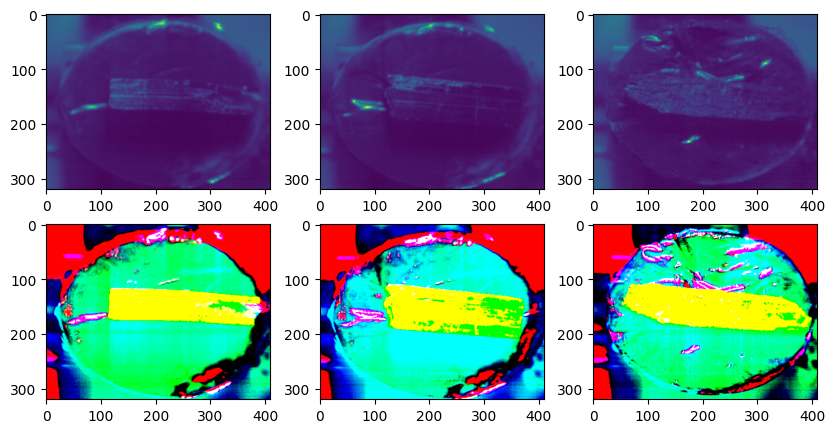

In [79]:
fig,ax = plt.subplots(2,3,figsize=(10,5))
cmap="inferno"
ax[0,0].imshow(hsi1[0,:,:],cmap=cmap)
ax[0,1].imshow(hsi2[0,:,:],cmap=cmap)
ax[0,2].imshow(hsi3[0,:,:],cmap=cmap)
ax[1,0].imshow(act1,cmap=cmap)
ax[1,1].imshow(act2,cmap=cmap)
ax[1,2].imshow(act3,cmap=cmap)
plt.show()

### Almandine

In [71]:
hsi1,red1 = dim_red_pca(df.loc[4,'HSI_Path'])
hsi2,red2 = dim_red_pca(df.loc[5,'HSI_Path'])
hsi3,red3 = dim_red_pca(df.loc[6,'HSI_Path'])
hsi4,red4 = dim_red_pca(df.loc[7,'HSI_Path'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


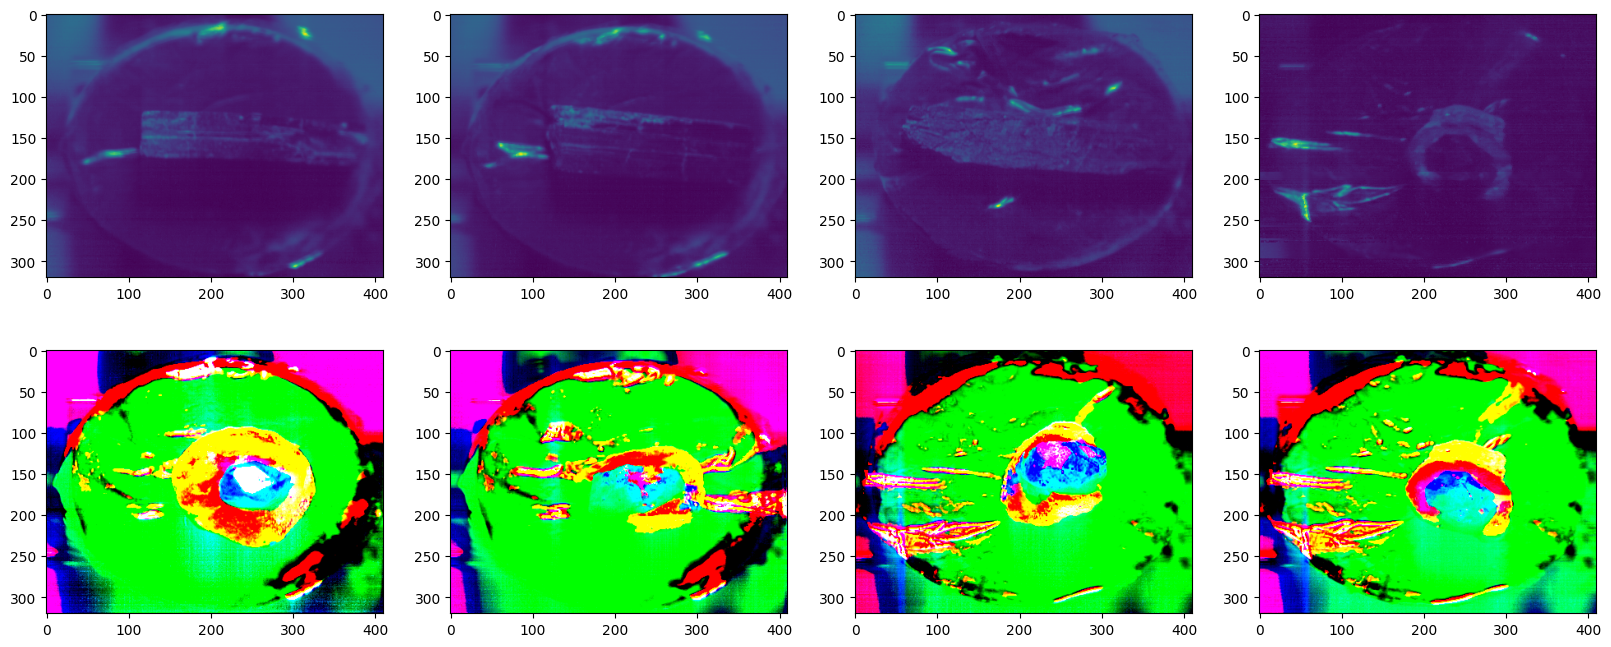

In [80]:
fig,ax = plt.subplots(2,4,figsize=(20,8))
cmap = "viridis"
ax[0,0].imshow(hsi1[0,:,:],cmap=cmap)
ax[0,1].imshow(hsi2[0,:,:],cmap=cmap)
ax[0,2].imshow(hsi3[0,:,:],cmap=cmap)
ax[0,3].imshow(hsi4[0,:,:],cmap=cmap)
ax[1,0].imshow(red1,cmap=cmap)
ax[1,1].imshow(red2,cmap=cmap)
ax[1,2].imshow(red3,cmap=cmap)
ax[1,3].imshow(red4,cmap=cmap)
plt.show()

In [16]:
hsi1,red1 = dim_red_umap(df.loc[4,'HSI_Path'])
hsi2,red2 = dim_red_umap(df.loc[5,'HSI_Path'])
hsi3,red3 = dim_red_umap(df.loc[6,'HSI_Path'])
hsi4,red4 = dim_red_umap(df.loc[7,'HSI_Path'])

UMAP(n_components=3, n_epochs=500, verbose=1)
Sat Sep 14 19:29:17 2024 Construct fuzzy simplicial set
Sat Sep 14 19:29:17 2024 Finding Nearest Neighbors
Sat Sep 14 19:29:17 2024 Building RP forest with 23 trees
Sat Sep 14 19:29:18 2024 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	Stopping threshold met -- exiting after 3 iterations
Sat Sep 14 19:29:19 2024 Finished Nearest Neighbor Search
Sat Sep 14 19:29:19 2024 Construct embedding


Epochs completed:   1%|            3/500 [00:00]

	completed  0  /  500 epochs


Epochs completed:  10%| █          52/500 [00:08]

	completed  50  /  500 epochs


Epochs completed:  20%| ██         102/500 [00:15]

	completed  100  /  500 epochs


Epochs completed:  30%| ███        152/500 [00:22]

	completed  150  /  500 epochs


Epochs completed:  40%| ████       202/500 [00:30]

	completed  200  /  500 epochs


Epochs completed:  50%| █████      252/500 [00:37]

	completed  250  /  500 epochs


Epochs completed:  60%| ██████     302/500 [00:45]

	completed  300  /  500 epochs


Epochs completed:  70%| ███████    352/500 [00:52]

	completed  350  /  500 epochs


Epochs completed:  80%| ████████   402/500 [01:00]

	completed  400  /  500 epochs


Epochs completed:  90%| █████████  452/500 [01:07]

	completed  450  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [01:15]


Sat Sep 14 19:30:48 2024 Finished embedding
UMAP(n_components=3, n_epochs=500, verbose=1)
Sat Sep 14 19:30:49 2024 Construct fuzzy simplicial set
Sat Sep 14 19:30:49 2024 Finding Nearest Neighbors
Sat Sep 14 19:30:49 2024 Building RP forest with 23 trees
Sat Sep 14 19:30:49 2024 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	Stopping threshold met -- exiting after 3 iterations
Sat Sep 14 19:30:50 2024 Finished Nearest Neighbor Search
Sat Sep 14 19:30:51 2024 Construct embedding


Epochs completed:   1%|            3/500 [00:01]

	completed  0  /  500 epochs


Epochs completed:  10%| █          52/500 [00:08]

	completed  50  /  500 epochs


Epochs completed:  20%| ██         102/500 [00:16]

	completed  100  /  500 epochs


Epochs completed:  30%| ███        152/500 [00:23]

	completed  150  /  500 epochs


Epochs completed:  40%| ████       202/500 [00:31]

	completed  200  /  500 epochs


Epochs completed:  50%| █████      252/500 [00:38]

	completed  250  /  500 epochs


Epochs completed:  60%| ██████     302/500 [00:46]

	completed  300  /  500 epochs


Epochs completed:  70%| ███████    352/500 [00:54]

	completed  350  /  500 epochs


Epochs completed:  80%| ████████   402/500 [01:01]

	completed  400  /  500 epochs


Epochs completed:  90%| █████████  452/500 [01:09]

	completed  450  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [01:16]


Sat Sep 14 19:32:21 2024 Finished embedding
UMAP(n_components=3, n_epochs=500, verbose=1)
Sat Sep 14 19:32:22 2024 Construct fuzzy simplicial set
Sat Sep 14 19:32:22 2024 Finding Nearest Neighbors
Sat Sep 14 19:32:22 2024 Building RP forest with 23 trees
Sat Sep 14 19:32:23 2024 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	Stopping threshold met -- exiting after 3 iterations
Sat Sep 14 19:32:23 2024 Finished Nearest Neighbor Search
Sat Sep 14 19:32:24 2024 Construct embedding


Epochs completed:   1%|            3/500 [00:00]

	completed  0  /  500 epochs


Epochs completed:  10%| █          52/500 [00:08]

	completed  50  /  500 epochs


Epochs completed:  20%| ██         102/500 [00:15]

	completed  100  /  500 epochs


Epochs completed:  30%| ███        152/500 [00:23]

	completed  150  /  500 epochs


Epochs completed:  40%| ████       202/500 [00:30]

	completed  200  /  500 epochs


Epochs completed:  50%| █████      252/500 [00:38]

	completed  250  /  500 epochs


Epochs completed:  60%| ██████     302/500 [00:45]

	completed  300  /  500 epochs


Epochs completed:  70%| ███████    352/500 [00:53]

	completed  350  /  500 epochs


Epochs completed:  80%| ████████   402/500 [01:00]

	completed  400  /  500 epochs


Epochs completed:  90%| █████████  452/500 [01:08]

	completed  450  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [01:15]


Sat Sep 14 19:34:00 2024 Finished embedding
UMAP(n_components=3, n_epochs=500, verbose=1)
Sat Sep 14 19:34:00 2024 Construct fuzzy simplicial set
Sat Sep 14 19:34:00 2024 Finding Nearest Neighbors
Sat Sep 14 19:34:00 2024 Building RP forest with 23 trees
Sat Sep 14 19:34:01 2024 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	Stopping threshold met -- exiting after 3 iterations
Sat Sep 14 19:34:02 2024 Finished Nearest Neighbor Search
Sat Sep 14 19:34:02 2024 Construct embedding


Epochs completed:   1%|            3/500 [00:01]

	completed  0  /  500 epochs


Epochs completed:  10%| █          52/500 [00:08]

	completed  50  /  500 epochs


Epochs completed:  20%| ██         102/500 [00:15]

	completed  100  /  500 epochs


Epochs completed:  30%| ███        152/500 [00:23]

	completed  150  /  500 epochs


Epochs completed:  40%| ████       202/500 [00:30]

	completed  200  /  500 epochs


Epochs completed:  50%| █████      252/500 [00:38]

	completed  250  /  500 epochs


Epochs completed:  60%| ██████     302/500 [00:45]

	completed  300  /  500 epochs


Epochs completed:  70%| ███████    352/500 [00:53]

	completed  350  /  500 epochs


Epochs completed:  80%| ████████   402/500 [01:00]

	completed  400  /  500 epochs


Epochs completed:  90%| █████████  452/500 [01:07]

	completed  450  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [01:15]


Sat Sep 14 19:35:37 2024 Finished embedding


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


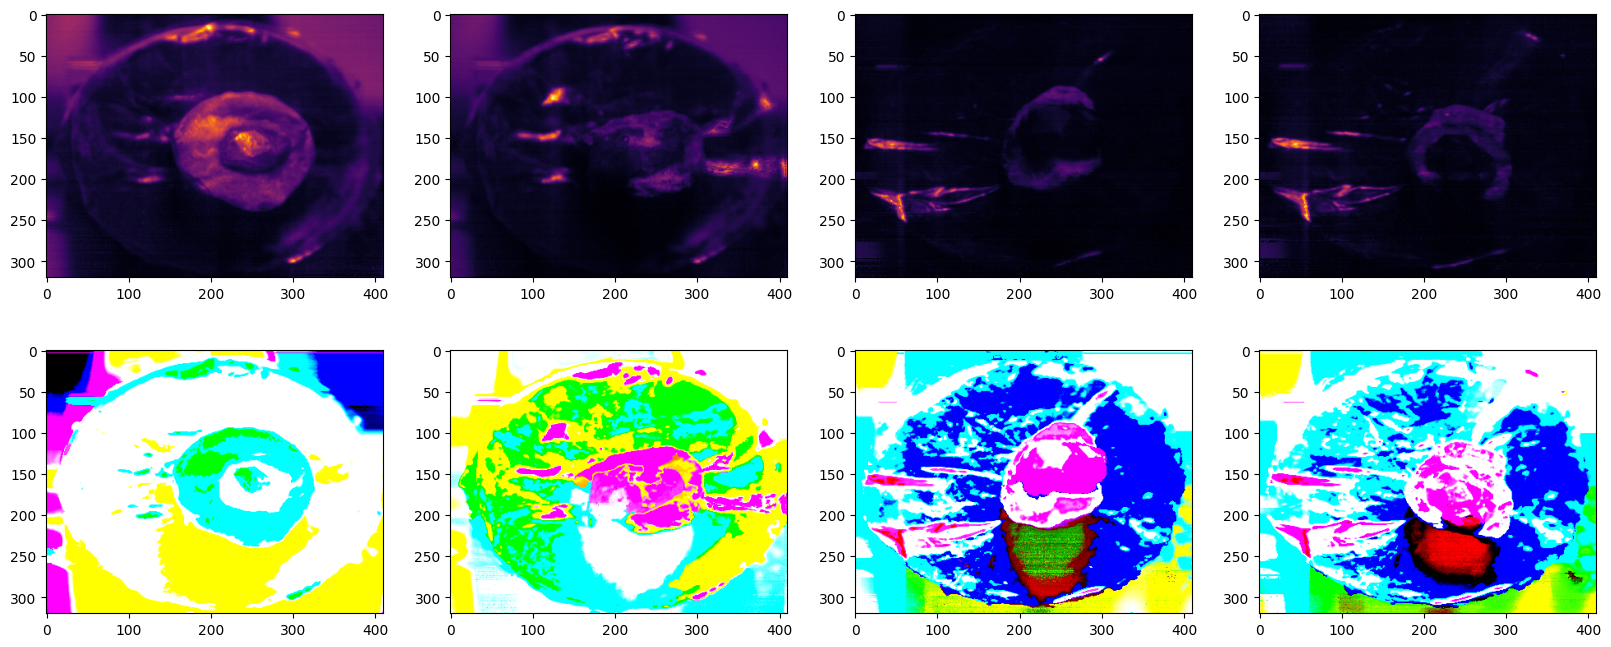

In [17]:
fig,ax = plt.subplots(2,4,figsize=(20,8))
cmap = "inferno"
ax[0,0].imshow(hsi1[0,:,:],cmap=cmap)
ax[0,1].imshow(hsi2[0,:,:],cmap=cmap)
ax[0,2].imshow(hsi3[0,:,:],cmap=cmap)
ax[0,3].imshow(hsi4[0,:,:],cmap=cmap)
ax[1,0].imshow(red1,cmap=cmap)
ax[1,1].imshow(red2,cmap=cmap)
ax[1,2].imshow(red3,cmap=cmap)
ax[1,3].imshow(red4,cmap=cmap)
plt.show()

### Biotite

In [21]:
hsi1,red1 = dim_red_pca(df.loc[21,'HSI_Path'])
hsi2,red2 = dim_red_pca(df.loc[22,'HSI_Path'])
hsi3,red3 = dim_red_pca(df.loc[23,'HSI_Path'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


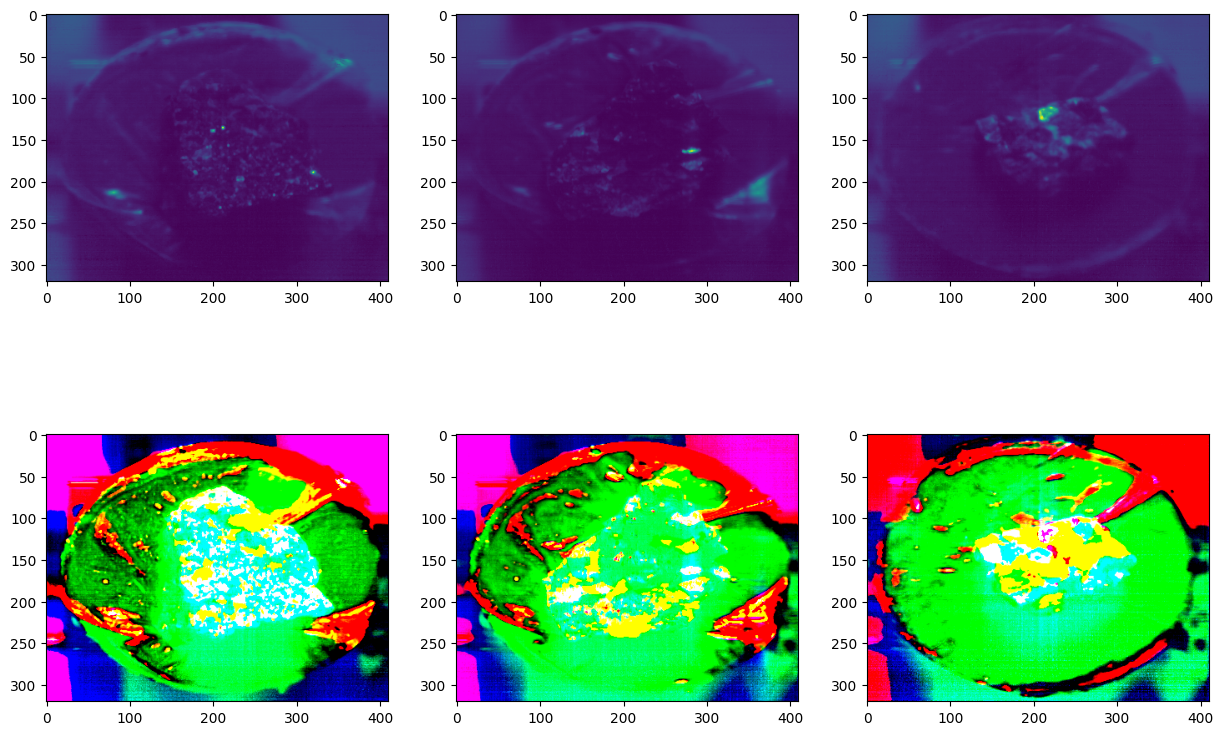

In [26]:
fig,ax = plt.subplots(2,3,figsize=(15,10))
cmap="viridis"
ax[0,0].imshow(hsi1[0,:,:],cmap=cmap)
ax[0,1].imshow(hsi2[0,:,:],cmap=cmap)
ax[0,2].imshow(hsi3[0,:,:],cmap=cmap)
ax[1,0].imshow(red1,cmap=cmap)
ax[1,1].imshow(red2,cmap=cmap)
ax[1,2].imshow(red3,cmap=cmap)
plt.show()

### Data Augmentations

In [7]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt

In [37]:
df.loc[0]

ID                                                           20
Experiment                                                    A
Mineral                                              Actinolite
HSI_Path      D:\HSI Project\Updated_Work\HSI_Classification...
MASK_Path     D:\HSI Project\Updated_Work\HSI_Classification...
Name: 0, dtype: object

In [44]:
hsi = np.transpose(loadmat(df.loc[7,'HSI_Path'])['HDR'],axes=(1,2,0))
mask = loadmat(df.loc[7,'MASK_Path'])['MASK']
print(hsi.shape,mask.shape)

(320, 410, 256) (320, 410)


In [14]:
numSegments = 100
segments = slic(hsi, n_segments = numSegments, sigma =0,compactness=0.5,max_num_iter=10)

In [16]:
segments.shape

(320, 410)

In [34]:
# # show the output of SLIC
# plt.figure(figsize=(20,20))
# fig = plt.figure("Superpixels -- %d segments" % (numSegments))
# ax = fig.add_subplot(1, 1, 1)
# ax.imshow(mark_boundaries(hsi[:,:,3], segments))
# plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


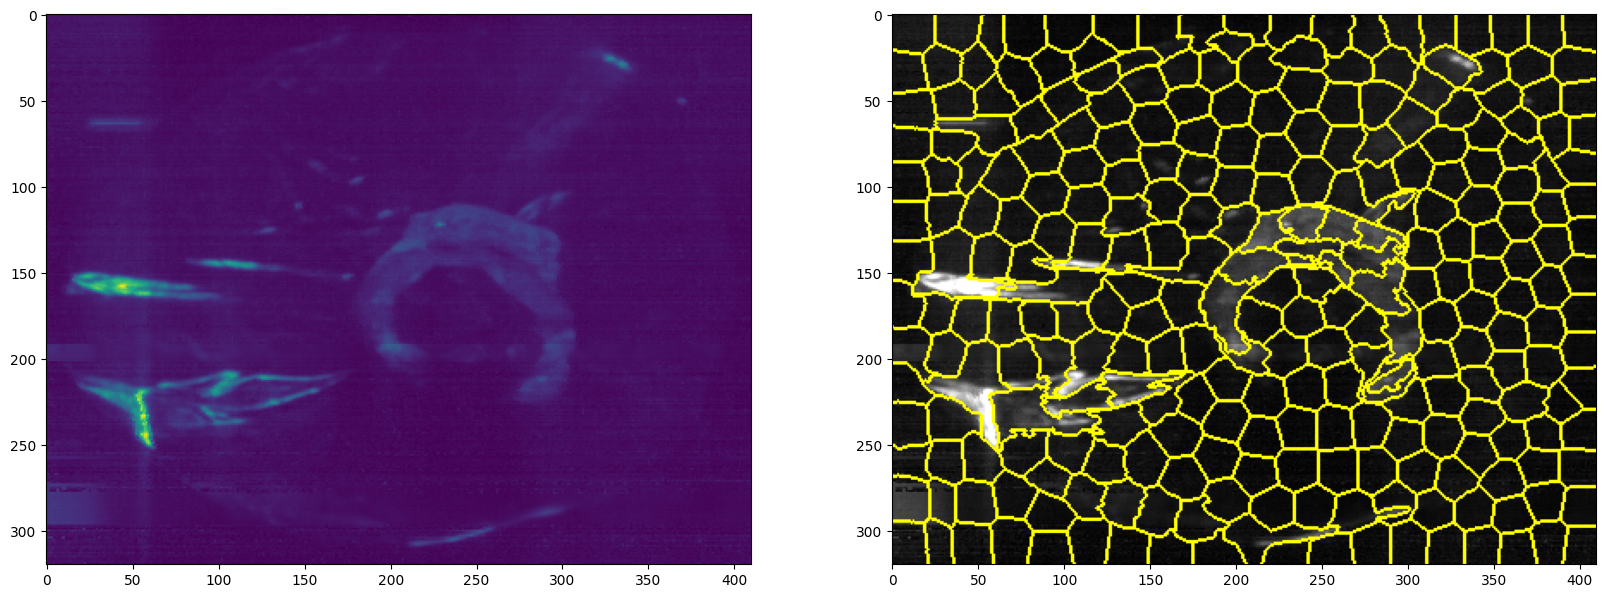

In [35]:
fig,ax = plt.subplots(1,2,figsize=(20,20))
ax[0].imshow(hsi[:,:,0])
ax[1].imshow(mark_boundaries(hsi[:,:,0], segments))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[18. 17.]
[26 26]
[6 9]


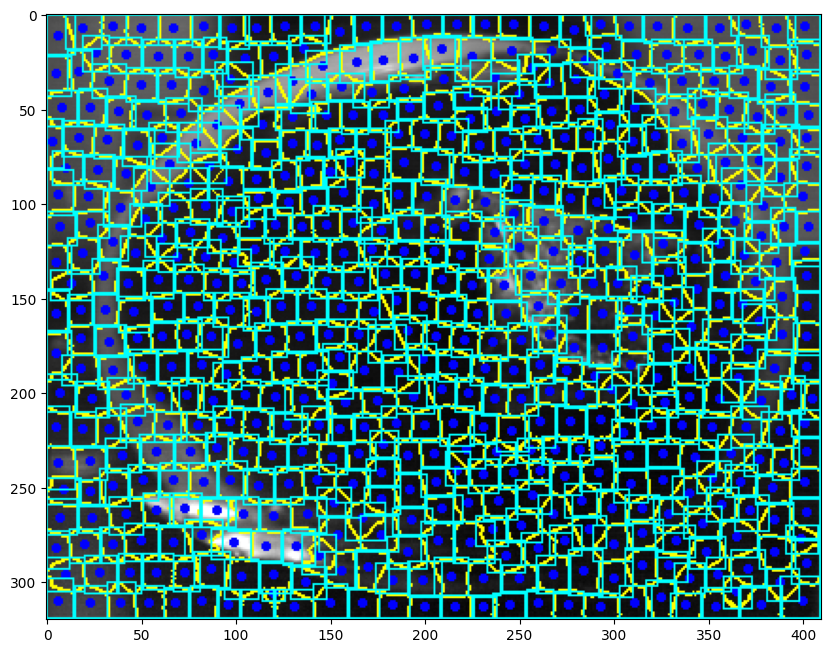

In [145]:
import cv2
import numpy as np

# Load the image
# image = cv2.imread('image.jpg')
id = 50
hsi = np.transpose(loadmat(df.loc[id,'HSI_Path'])['HDR'],axes=(1,2,0))
mask = loadmat(df.loc[id,'MASK_Path'])['MASK']


# Create SLICO superpixel object
slico = cv2.ximgproc.createSuperpixelSLIC(hsi, algorithm=cv2.ximgproc.SLICO, region_size=15)
# slico = cv2.ximgproc.createSuperpixelSLIC(hsi, algorithm=cv2.ximgproc.MSLIC, region_size=20)
# Perform the SLICO segmentation
slico.iterate(20)  # Number of iterations for refinement

# Get the mask showing the superpixel boundaries
mask_slico = slico.getLabelContourMask()
# Get the labels (each pixel gets a superpixel label)
labels = slico.getLabels()

# Get unique labels (superpixels)
unique_labels = np.unique(labels)

# Initialize list to hold centers
centers = []

# Calculate centers for each superpixel
for label in unique_labels:
    # Get coordinates of pixels in the current superpixel
    coords = np.column_stack(np.where(labels == label))
    
    # Calculate the center of the superpixel
    center = np.mean(coords, axis=0)
    centers.append(center)

# Convert centers to integers
centers = np.array(centers, dtype=int)

# Visualize superpixel boundaries
boundaries = mark_boundaries(hsi[:,:,0], labels ) 

# Draw centers on the boundaries image
for center in centers:
    cv2.circle(boundaries, (center[1], center[0]), radius=1, color=(0, 0, 1), thickness=2)  # Blue color for centers

shapes_rect = []

# Draw rectangles around each superpixel
for label in unique_labels:
    # Get coordinates of pixels in the current superpixel
    coords = np.column_stack(np.where(labels == label))
    
    # Calculate the bounding box
    if len(coords) > 0:  # Check if there are any coordinates
        x_min, y_min = np.min(coords, axis=0)  # Top-left corner
        x_max, y_max = np.max(coords, axis=0)  # Bottom-right corner
        shapes_rect.append([x_max-x_min,y_max-y_min])
        # Draw the rectangle (BGR format)
        cv2.rectangle(boundaries, (y_min, x_min), (y_max, x_max), color=(0, 1, 1), thickness=1)  # Green rectangles

shapes_rect = np.array(shapes_rect)
print(np.median(shapes_rect,axis=0))
print(np.max(shapes_rect,axis=0))
print(np.min(shapes_rect,axis=0))
# # Overlay the mask on the original image to visualize the superpixels
# output_slico = cv2.bitwise_and(hsi, hsi, mask=~mask_slico)


# Display the image with superpixels
# cv2.imshow("SLICO Superpixels", output_slico)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# plt.imshow(~mask_slico,cmap='gray')
plt.figure(figsize=(10,10))
plt.imshow(boundaries)

In [137]:
unique_labels.shape

(320,)

(320, 460, 256) (320, 460)
<class 'albumentations.augmentations.geometric.rotate.Rotate'>


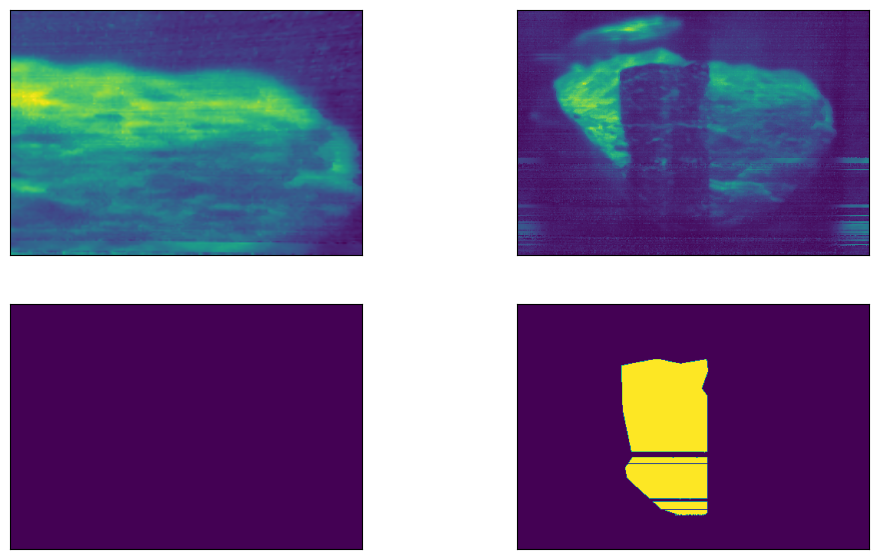

In [117]:
import albumentations as A
id = 20
hsi = np.transpose(loadmat(df.loc[id,'HSI_Path'])['HDR'],axes=(1,2,0))
mask = loadmat(df.loc[id,'MASK_Path'])['MASK']
print(hsi.shape,mask.shape)

fig,ax = plt.subplots(2,2,figsize=(12,7))
tf = A.Compose([
    # A.Rotate(limit=90, p=1.0)
    # A.HorizontalFlip(p=1)   
    # A.VerticalFlip(p=1)
    # A.RandomRotate90(p=1)
    # A.Transpose(p=1)
    # A.ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)
    # A.GridDistortion(p=1)
    A.OpticalDistortion(distort_limit=2, shift_limit=0.5, p=1),
    A.RandomSizedCrop(min_max_height=(100,200), height=hsi.shape[0], width=hsi.shape[1], p=1)
])
aug = tf(image=hsi,mask=mask)
cmap = 'viridis'
aug_img = aug['image']
aug_mask = aug['mask']
ax[0,0].imshow(aug['image'][:,:,0],cmap=cmap)
ax[0,1].imshow(hsi[:,:,0],cmap=cmap)
ax[1,0].imshow(aug_mask,cmap=cmap)
ax[1,1].imshow(mask,cmap=cmap)
plt.setp(ax, xticks=[], yticks=[])
plt.show()


In [113]:
def albumentation_aug(composed_albumentations_aug,hsi_image,mask):
    # hsi_image => (256,320,410)
    hsi_image_new = np.transpose(hsi_image,axes=(1,2,0))
    aug = composed_albumentations_aug(image=hsi_image_new,mask=mask)
    aug_img = aug['image']
    aug_mask = aug['mask']
    return aug_img,aug_mask




AttributeError: module 'matplotlib.pyplot' has no attribute 'line'